In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score,confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings

%matplotlib inline

In [81]:
pd.set_option('display.max_columns',None)
np.set_printoptions(precision=2)
warnings.filterwarnings('ignore')

In [82]:
sns.set_palette('husl',9)

In [83]:
data = pd.read_csv('creditcard.csv')

In [84]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [85]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [86]:
#对amount列进行标准化/ Normalize the amount column

In [87]:
ss = StandardScaler()

In [88]:
data['Amount_standard'] = ss.fit_transform(data['Amount'].values.reshape(-1,1))

In [89]:
data.drop(columns = ['Amount','Time'],inplace=True)


In [90]:
#切分数据集 /split dataset

In [91]:
feature = data.loc[:,data.columns!='Class']
target = data.loc[:,data.columns=='Class']
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=0)

<AxesSubplot:>

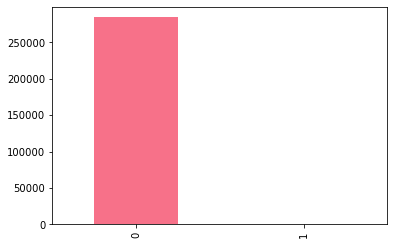

In [92]:
target['Class'].value_counts().plot(kind = 'bar')

#可以观察到标签数据分类严重不均衡，可采用两种方案建模进行比较
方案一：下采样
方案二：过采样

# 方案一：下采样方案/Scheme 1: Downsampling Scheme

In [93]:
#随机抽取下采样所需数据/Randomly extract the data required for downsampling

In [94]:
under_target_1_index = target[target['Class']==1].index

In [95]:
target_0_index = target[target['Class']==0].index

In [96]:
under_target_0_index = np.random.choice(target_0_index,len(under_target_1_index),replace = False)

In [97]:
df1 = data.iloc[under_target_0_index,:]
df2 = data.iloc[under_target_1_index,:]
under_data = pd.concat([df1,df2])


In [98]:
under_data.reset_index(drop ='index',inplace=True)

In [99]:
#切分下采样数据集/Split the downsampled dataset

In [100]:
under_feature = under_data.loc[:,under_data.columns != 'Class']
under_target = under_data.loc[:,under_data.columns == 'Class']
under_x_train,under_x_test,under_y_train,under_y_test = train_test_split(under_feature,under_target,test_size=0.2,random_state=1)

In [101]:
#建立逻辑回归模型，并利用交叉验证寻找最佳超参数,模型评价方法选为recall/
#Establish a logistic regression model and use cross-validation to find the best hyperparameters. The model evaluation method is selected as recall

In [106]:
def output_lr_result(x_train,y_train):
    c_params = [0.01,0.1,1,10,100]
    recall_score_mean = []
    
    kfold = KFold(n_splits=5,shuffle=False)
    
    #写一个dataframe用于输出最优参数和最大平均召回率
    #Write a dataframe to output the optimal parameters and maximum average recall
    c_recall_result = pd.DataFrame(index = range(len(c_params)),columns=['c_param','recall_mean'])
    c_recall_result.loc[:,'c_param'] = c_params
    
    for c in c_params:
        print('-'*50)
        print(f'The current hyperparameter c is {c}')
        print('-'*50)
        lr = LogisticRegression(penalty='l2',C=c)
        
        recall_list = []
        for iteration,index in enumerate(kfold.split(x_train)):
            
            
            #切分数据集/split dataset
            kfold_x_train = x_train.iloc[index[0],:]
            kfold_x_test = x_train.iloc[index[1],:]
            kfold_y_train = y_train.iloc[index[0],:].values.ravel()
            kfold_y_test = y_train.iloc[index[1],:].values.ravel()
            
            #训练模型/training model
            lr.fit(kfold_x_train,kfold_y_train)
            y_pred = lr.predict(kfold_x_test)
            recall = recall_score(kfold_y_test,y_pred)
            recall_list.append(recall)
            
            #输出结果/output result
            print(f'The current iteration is {iteration},and recall score is {recall}')
            
        recall_mean  = np.mean(recall_list)
        recall_score_mean.append(recall_mean)
        
        print('')
        print(f'The current average recall is {recall_mean}')
    
    c_recall_result.loc[:,'recall_mean'] = recall_score_mean
    best_recall_mean = c_recall_result['recall_mean'].max()
    best_c_index = c_recall_result[c_recall_result['recall_mean'] == best_recall_mean].index
    best_result = c_recall_result.iloc[best_c_index,:]
    best_c = best_result['c_param'].values[0]
    best_recall_mean = best_result['recall_mean'].values[0]
    print('')
    print('*'*50)
    print(f'The best hyperparameter c is {best_c},The average recall is {best_recall_mean}')
    
    

In [107]:
output_lr_result(under_x_train,under_y_train)

--------------------------------------------------
The current hyperparameter c is 0.01
--------------------------------------------------
The current iteration is 0,and recall score is 0.8658536585365854
The current iteration is 1,and recall score is 0.9420289855072463
The current iteration is 2,and recall score is 0.9047619047619048
The current iteration is 3,and recall score is 0.935064935064935
The current iteration is 4,and recall score is 0.8076923076923077

The current average recall is 0.8910803583125958
--------------------------------------------------
The current hyperparameter c is 0.1
--------------------------------------------------
The current iteration is 0,and recall score is 0.9024390243902439
The current iteration is 1,and recall score is 0.9420289855072463
The current iteration is 2,and recall score is 0.9166666666666666
The current iteration is 3,and recall score is 0.948051948051948
The current iteration is 4,and recall score is 0.8589743589743589

The current av

In [108]:
def my_confusion_martix(cm,classes,title='Confusion Martix',cmap = plt.cm.Reds):
    """
    绘制混淆矩阵/plot confusion matrix
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [109]:
#模型在下采样数据集中的表现/Performance of the model on the downsampled dataset

The Recall score is 0.9789473684210527


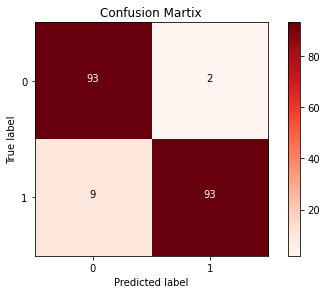

In [110]:
lr = LogisticRegression(penalty='l2',C=100)
lr.fit(under_x_train,under_y_train.values.ravel())
under_y_pred = lr.predict(under_x_test)
martix = confusion_matrix(under_y_test,under_y_pred)

recall_s = martix[0,0]/(martix[0,0]+martix[0,1])
print(f'The Recall score is {recall_s}')
plt.figure()
my_confusion_martix(martix,classes = [0,1])
plt.show()

In [111]:
#观察sigmod函数在不同阈值下，模型的表现/
#Observe the performance of the model under different thresholds of the sigmod function

when threshold is 0.1，recall score is 0.8105263157894737
when threshold is 0.2，recall score is 0.9263157894736842
when threshold is 0.3，recall score is 0.9578947368421052
when threshold is 0.4，recall score is 0.9789473684210527
when threshold is 0.5，recall score is 0.9789473684210527
when threshold is 0.6，recall score is 0.9789473684210527
when threshold is 0.7，recall score is 0.9894736842105263
when threshold is 0.8，recall score is 0.9894736842105263
when threshold is 0.9，recall score is 0.9894736842105263
--------------------------------------------------

when threshold is [0.7 0.8 0.9]，recall score is best，it is 0.9894736842105263


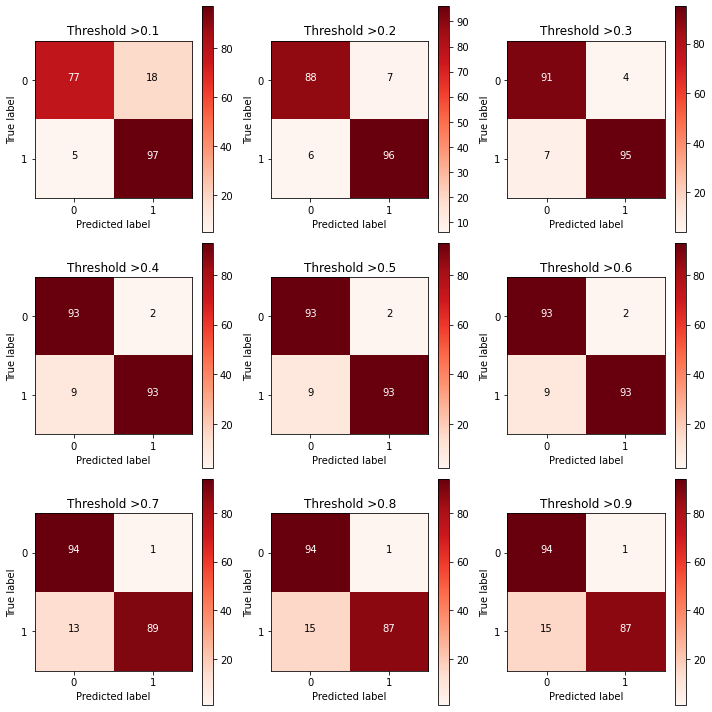

In [112]:
lr = LogisticRegression(C=100)
lr.fit(under_x_train,under_y_train)
under_y_pred_proba = lr.predict_proba(under_x_test)

threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

plt.figure(figsize=(10,10))
j=1

#写个dataframe存放阈值和召回率用于找出最大值/
#Write a dataframe to store the threshold and recall rate to find the maximum value

df = pd.DataFrame(index = range(len(threshold)),columns = ['threshold','recall_score'])
df['threshold'] = threshold
for iteration,item in enumerate(threshold):
    under_y_pred = (under_y_pred_proba > item)
    martix_under = confusion_matrix(under_y_test,under_y_pred[:,1])
    recall = martix_under[0,0]/(martix_under[0,0]+martix_under[0,1])
    print(f'when threshold is {item}，recall score is {recall}')
    
    #将召回率写入df
    df.loc[iteration,'recall_score'] = recall
    
    #绘图
    plt.subplot(3,3,j)
    np.set_printoptions(precision=2)
    my_confusion_martix(martix_under,classes=[0,1],title = f'Threshold >{item}')
    j+=1
    
max_recall =np.max(df['recall_score'].values)
max_recall_index = df[df['recall_score'] == max_recall].index
max_threshold = df.loc[max_recall_index,'threshold'].values
print('-'*50)
print('')
print(f'when threshold is {max_threshold}，recall score is best，it is {max_recall}')


In [113]:
#模型在原始数据集中的表现,此时模型超参数为100，sigmod函数的阈值为0.8/
#The performance of the model in the original data set. At this time, the model hyperparameter is 100, and the threshold of the sigmod function is 0.8

The recall score is 0.9998768927736058


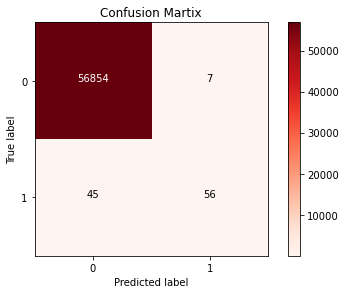

In [114]:
lr = LogisticRegression(penalty='l2',C=100)
lr.fit(x_train,y_train.values.ravel())
y_pred_proba = lr.predict_proba(x_test)
y_pred = (y_pred_proba>0.8)[:,1]
martix = confusion_matrix(y_test,y_pred)

recall_s = martix[0,0]/(martix[0,0]+martix[0,1])
print(f'The recall score is {recall_s}')

my_confusion_martix(martix,classes = [0,1])


# 方案二：过采样方案/Scheme 2: Oversampling scheme

In [115]:
#使用SMOTE创造数据/Create data with SMOTE

In [116]:
smote = SMOTE(random_state=0)

In [117]:
os_feature,os_target = smote.fit_resample(feature,target)

In [118]:
os_x_train,os_x_test,os_y_train,os_y_test = train_test_split(os_feature,os_target,random_state=1,test_size=0.2)

In [119]:
output_lr_result(os_x_train,os_y_train)

--------------------------------------------------
The current hyperparameter c is 0.01
--------------------------------------------------
The current iteration is 0,and recall score is 0.9152344951870247
The current iteration is 1,and recall score is 0.9145086832270829
The current iteration is 2,and recall score is 0.9145238674301885
The current iteration is 3,and recall score is 0.910855940745935
The current iteration is 4,and recall score is 0.9150459921156373

The current average recall is 0.9140337957411738
--------------------------------------------------
The current hyperparameter c is 0.1
--------------------------------------------------
The current iteration is 0,and recall score is 0.9169267284954508
The current iteration is 1,and recall score is 0.9166410200043966
The current iteration is 2,and recall score is 0.9175086780605364
The current iteration is 3,and recall score is 0.9145154928342902
The current iteration is 4,and recall score is 0.9168637757336837

The current a

In [120]:
#绘制模型在过采样数据集中的混淆矩阵/Plot the confusion matrix of the model on the oversampled dataset

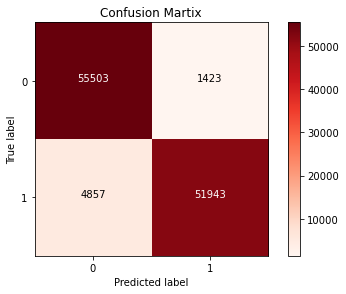

In [121]:
lr = LogisticRegression(C=10)
lr.fit(os_x_train,os_y_train)
os_y_pred = lr.predict(os_x_test)
confusion_m = confusion_matrix(os_y_test,os_y_pred)
my_confusion_martix(confusion_m,classes = [0,1])

In [122]:
#绘制在不同阈值下的混淆矩阵/Confusion matrix plotted at different thresholds

When threshold is 0.1，recall score is 0.7933984471067702
When threshold is 0.2，recall score is 0.9057724062818395
When threshold is 0.3，recall score is 0.9452798369813442
When threshold is 0.4，recall score is 0.9634086357727576
When threshold is 0.5，recall score is 0.9750026349998243
When threshold is 0.6，recall score is 0.9823806345079577
When threshold is 0.7，recall score is 0.9872817341812177
When threshold is 0.8，recall score is 0.9909180339387977
When threshold is 0.9，recall score is 0.9935003337666444

**************************************************
When threshold is 0.9，recall score is best，it is 0.9935003337666444
**************************************************


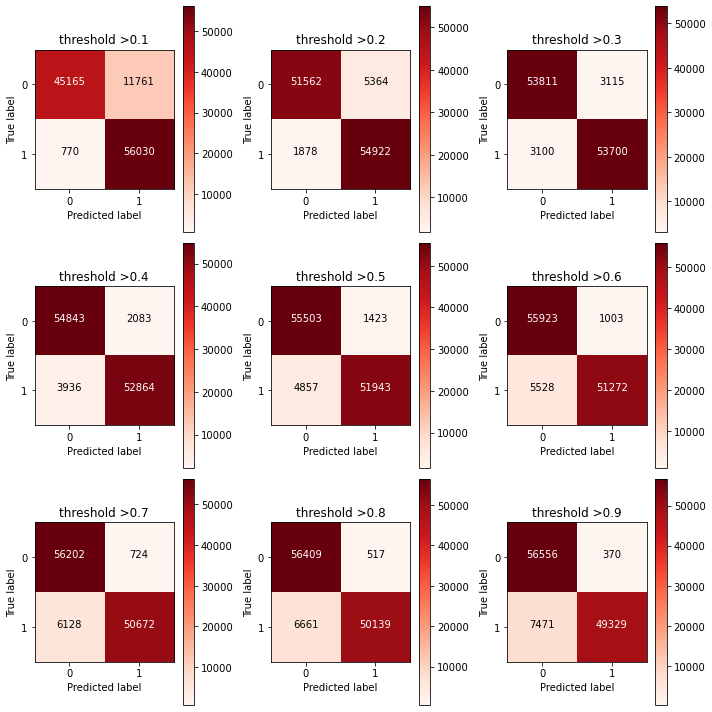

In [123]:
lr = LogisticRegression(C=10)
lr.fit(os_x_train,os_y_train)
os_y_pred_proba = lr.predict_proba(os_x_test)

threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.figure(figsize=(10,10))

#写个dataframe存放阈值和召回率，用于找出最大召回率和其对应阈值/
#Write a dataframe to store the threshold and recall rate, which is used to find the maximum recall rate and its corresponding threshold

df = pd.DataFrame(index = range(len(threshold)),columns = ['threshold','recall_score'])
df['threshold'] = threshold


for iteration,item in enumerate(threshold):
    os_y_pred = (os_y_pred_proba[:,1]>item)
    con_martix = confusion_matrix(os_y_test,os_y_pred)
    recall = con_martix[0,0]/(con_martix[0,0]+con_martix[0,1])
    df.loc[iteration,'recall_score'] = recall
    
    plt.subplot(3,3,iteration+1)
    my_confusion_martix(con_martix,classes = [0,1],title = f'threshold >{item}')
    print(f'When threshold is {item}，recall score is {recall}')
    
#找出最大召回率和其所对应阈值/Find the maximum recall and its corresponding threshold
max_recall = np.max(df['recall_score'])
max_index = df[df['recall_score'] == max_recall].index
max_threshold = df.loc[max_index,'threshold'].values[0]
print('')
print('*'*50)
print(f'When threshold is {max_threshold}，recall score is best，it is {max_recall}')
print('*'*50)

In [124]:
#绘制模型在原始数据集中的混淆矩阵,此时模型超参数为10，sigmod函数的阈值为0.9/
#The confusion matrix of the model in the original data set, at this time the model hyperparameter is 10, and the threshold of the sigmod function is 0.9

At this time, the  recall score is 0.9998944795202336


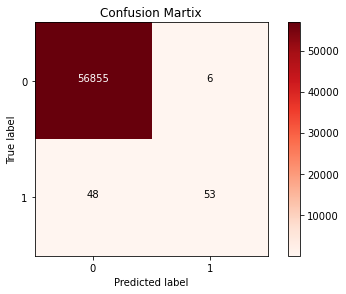

In [125]:
lr = LogisticRegression(C=10)
lr.fit(x_train,y_train)
y_pred_proba = lr.predict_proba(x_test)
y_pred =(y_pred_proba>0.9)[:,1]


con_m = confusion_matrix(y_test,y_pred)
my_confusion_martix(con_m,classes = [0,1])

recall = con_m[0,0]/(con_m[0,0]+con_m[0,1])
print(f'At this time, the  recall score is {recall}')